# Question 1: Do geographical boundaries affect audience reception of runtimes? Have there been any changing trends?

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb_title_akas = pd.read_csv('unzippedData/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('unzippedData/imdb.title.basics.csv')
imdb_title_ratings = pd.read_csv('unzippedData/imdb.title.ratings.csv')

### We need the following information from these tables:
 - imdb_title_akas - tconst, region
 - imdb_title_basics - tconst, primary_title, start_year, runtime_minutes
 - imdb_title_ratings - tconst, averagerating, numvotes  

In [3]:
# Rename "title_id" column in imdb_title_akas as "tconst"- 
# these are the same values across all IMDB tables but are named weirdly.
# This also sets tconst as index, which we'll need to ensure matching tables

imdb_title_akas.rename(columns = {'title_id':'tconst'}, inplace=True) 

In [4]:
# Set "tconst" as index in imdb_title_akas.

imdb_title_akas.set_index('tconst', inplace=True)

In [5]:
# Set "tconst" as index in imdb_title_basics.

imdb_title_basics.set_index('tconst', inplace=True)

In [6]:
# Set "tconst" as index in imdb_title_ratings.

imdb_title_ratings.set_index('tconst', inplace=True)

In [7]:
# Boil a imdb_title_basics down to only the primary_title, start_year, and runtime_minutes columns.

trimmed_basics_df = imdb_title_basics.drop(['genres', 'original_title'], axis=1)

In [8]:
#New combined df of should have title, run time, region.

basics_merge_akas_df = trimmed_basics_df.merge(imdb_title_akas['region'],how='left', left_index=True, right_index=True)


In [9]:
basics_merge_akas_df.head(5)

,primary_title,start_year,runtime_minutes,region
tconst,,,,
tt0063540,Sunghursh,2013,175.0,IN
tt0063540,Sunghursh,2013,175.0,NaN
tt0063540,Sunghursh,2013,175.0,IN
tt0063540,Sunghursh,2013,175.0,IN
tt0063540,Sunghursh,2013,175.0,IN


In [10]:
# Create column 'rating_percent' which is 'averagerating' as a percentage.

imdb_title_ratings['rating_percent'] = (imdb_title_ratings['averagerating'] * 10)

In [11]:
trimmed_imdb_ratings_df = imdb_title_ratings.drop(['averagerating', 'numvotes'], axis=1)

In [12]:
# Merge our new rating percent table into our basics_merge_akas
# table to create our final runtime_comparisons table.

runtimes_df = basics_merge_akas_df.merge(trimmed_imdb_ratings_df, how='left', left_index=True, right_index=True)


In [13]:
runtimes_df.head(10)

,primary_title,start_year,runtime_minutes,region,rating_percent
tconst,,,,,
tt0063540,Sunghursh,2013,175.0,IN,70.0
tt0063540,Sunghursh,2013,175.0,NaN,70.0
tt0063540,Sunghursh,2013,175.0,IN,70.0
tt0063540,Sunghursh,2013,175.0,IN,70.0
tt0063540,Sunghursh,2013,175.0,IN,70.0
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0
tt0066787,One Day Before the Rainy Season,2019,114.0,IN,72.0
tt0066787,One Day Before the Rainy Season,2019,114.0,NaN,72.0
tt0066787,One Day Before the Rainy Season,2019,114.0,NaN,72.0


In [14]:
# Rename start_year column as release_year in runtimes_df.

runtimes_df.rename(columns = {'start_year':'release_year'}, inplace=True) 

In [15]:
# Rename primary_title column as title in runtimes_df.

runtimes_df.rename(columns = {'primary_title':'title'}, inplace=True)

In [16]:
runtimes_df = runtimes_df[~runtimes_df.index.duplicated(keep='first')]

In [17]:
runtimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
title              146144 non-null object
release_year       146144 non-null int64
runtime_minutes    114405 non-null float64
region             107489 non-null object
rating_percent     73856 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.7+ MB


In [18]:
# Replace 0 values in runtimes_df['release_year'] with NaN.

runtimes_df.release_year.replace(0, np.NaN)

tconst
tt0063540    2013
tt0066787    2019
tt0069049    2018
tt0069204    2018
tt0100275    2017
             ... 
tt9916538    2019
tt9916622    2015
tt9916706    2013
tt9916730    2017
tt9916754    2013
Name: release_year, Length: 146144, dtype: int64

In [19]:
# Replace 0 values in runtimes_df['runtime_minutes'] with NaN.

runtimes_df.runtime_minutes.replace(0, np.NaN)

tconst
tt0063540    175.0
tt0066787    114.0
tt0069049    122.0
tt0069204      NaN
tt0100275     80.0
             ...  
tt9916538    123.0
tt9916622      NaN
tt9916706      NaN
tt9916730    116.0
tt9916754      NaN
Name: runtime_minutes, Length: 146144, dtype: float64

In [20]:
# Replace 0 values in runtimes_df['rating_percent'] with NaN.

runtimes_df.rating_percent.replace(0, np.NaN)

tconst
tt0063540    70.0
tt0066787    72.0
tt0069049    69.0
tt0069204    61.0
tt0100275    65.0
             ... 
tt9916538     NaN
tt9916622     NaN
tt9916706     NaN
tt9916730     NaN
tt9916754     NaN
Name: rating_percent, Length: 146144, dtype: float64

In [21]:
# Drop rows with any NaN values; all columns are needed for analysis.

runtimes_df = runtimes_df.dropna()

In [22]:
runtimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52158 entries, tt0063540 to tt9903952
Data columns (total 5 columns):
title              52158 non-null object
release_year       52158 non-null int64
runtime_minutes    52158 non-null float64
region             52158 non-null object
rating_percent     52158 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ MB


In [23]:
runtimes_df.release_year.astype(int, inplace=True)

tconst
tt0063540    2013
tt0066787    2019
tt0069049    2018
tt0137204    2017
tt0146592    2010
             ... 
tt9846154    2018
tt9879060    2018
tt9899840    2018
tt9899860    2019
tt9903952    2018
Name: release_year, Length: 52158, dtype: int64

In [24]:
# Remove anything with runtime_minutes under 75 minutes and over 240 minutes.

runtimes_df.drop(runtimes_df[(runtimes_df['runtime_minutes'] < 75) | (runtimes_df['runtime_minutes'] > 120)].index, inplace=True)


In [25]:
# Too many unique values in 'region' exist. Create a new column, 'domestic',
# which sets a 1 or 0 value if domestic or foreign.

runtimes_df['domestic'] = np.where(runtimes_df['region'] == "US", 1 , 0)

In [87]:
runtimes_df.head(30)

,title,release_year,runtime_minutes,region,rating_percent,domestic,runtime_bin
tconst,,,,,,,
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0,0,"(105.0, 115.0]"
tt0137204,Joe Finds Grace,2017,83.0,CA,81.0,0,"(74.999, 85.0]"
tt0162942,Children of the Green Dragon,2010,89.0,PL,69.0,0,"(85.0, 95.0]"
tt0192528,Heaven & Hell,2018,104.0,US,40.0,1,"(95.0, 105.0]"
tt0230212,The Final Journey,2010,120.0,US,88.0,1,"(115.0, 125.0]"
tt0247643,Los pájaros se van con la muerte,2011,110.0,VE,40.0,0,"(105.0, 115.0]"
tt0249516,Foodfight!,2012,91.0,FI,19.0,0,"(85.0, 95.0]"
tt0255820,Return to Babylon,2013,75.0,US,59.0,1,"(74.999, 85.0]"
tt0276568,To Chase a Million,2018,97.0,GB,74.0,0,"(95.0, 105.0]"


In [26]:
# Bin runtime_minutes to simplify swarmplot.
# df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

runtimes_df['runtime_bin'] = pd.cut(x=runtimes_df['runtime_minutes'], bins=[75, 85, 95, 105, 115, 125], include_lowest=True)

In [27]:
runtimes_df1 = runtimes_df.copy()

In [28]:
runtimes_df1.head()

,title,release_year,runtime_minutes,region,rating_percent,domestic,runtime_bin
tconst,,,,,,,
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0,0,"(105.0, 115.0]"
tt0137204,Joe Finds Grace,2017,83.0,CA,81.0,0,"(74.999, 85.0]"
tt0162942,Children of the Green Dragon,2010,89.0,PL,69.0,0,"(85.0, 95.0]"
tt0192528,Heaven & Hell,2018,104.0,US,40.0,1,"(95.0, 105.0]"
tt0230212,The Final Journey,2010,120.0,US,88.0,1,"(115.0, 125.0]"


In [29]:
runtimes_df1.drop(runtimes_df1[runtimes_df1['release_year'] < 2011].index, inplace=True) 

In [31]:
runtimes_df1.drop(runtimes_df1[runtimes_df1['release_year'] > 2012].index, inplace=True) 

In [34]:
runtimes_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, tt0247643 to tt9385434
Data columns (total 7 columns):
title              8631 non-null object
release_year       8631 non-null int64
runtime_minutes    8631 non-null float64
region             8631 non-null object
rating_percent     8631 non-null float64
domestic           8631 non-null int64
runtime_bin        8631 non-null category
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 800.7+ KB


In [35]:
runtimes_df2 = runtimes_df.copy()

In [36]:
runtimes_df2.head()

,title,release_year,runtime_minutes,region,rating_percent,domestic,runtime_bin
tconst,,,,,,,
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0,0,"(105.0, 115.0]"
tt0137204,Joe Finds Grace,2017,83.0,CA,81.0,0,"(74.999, 85.0]"
tt0162942,Children of the Green Dragon,2010,89.0,PL,69.0,0,"(85.0, 95.0]"
tt0192528,Heaven & Hell,2018,104.0,US,40.0,1,"(95.0, 105.0]"
tt0230212,The Final Journey,2010,120.0,US,88.0,1,"(115.0, 125.0]"


In [37]:
runtimes_df2.drop(runtimes_df2[runtimes_df2['release_year'] < 2013].index, inplace=True) 

In [38]:
runtimes_df2.drop(runtimes_df2[runtimes_df2['release_year'] > 2014].index, inplace=True) 

In [39]:
runtimes_df2.describe()

,release_year,runtime_minutes,rating_percent,domestic
count,9208.000000,9208.000000,9208.000000,9208.000000
mean,2013.506516,93.308862,62.061251,0.299088
std,0.499985,11.117673,14.048387,0.457883
min,2013.000000,75.000000,10.000000,0.000000
25%,2013.000000,85.000000,54.000000,0.000000
50%,2014.000000,92.000000,63.000000,0.000000
75%,2014.000000,100.000000,72.000000,1.000000
max,2014.000000,120.000000,98.000000,1.000000


In [40]:
runtimes_df3 = runtimes_df.copy()

In [41]:
runtimes_df3.head()

,title,release_year,runtime_minutes,region,rating_percent,domestic,runtime_bin
tconst,,,,,,,
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0,0,"(105.0, 115.0]"
tt0137204,Joe Finds Grace,2017,83.0,CA,81.0,0,"(74.999, 85.0]"
tt0162942,Children of the Green Dragon,2010,89.0,PL,69.0,0,"(85.0, 95.0]"
tt0192528,Heaven & Hell,2018,104.0,US,40.0,1,"(95.0, 105.0]"
tt0230212,The Final Journey,2010,120.0,US,88.0,1,"(115.0, 125.0]"


In [42]:
runtimes_df3.drop(runtimes_df3[runtimes_df3['release_year'] < 2015].index, inplace=True) 

In [43]:
runtimes_df3.drop(runtimes_df3[runtimes_df3['release_year'] > 2016].index, inplace=True) 

In [44]:
runtimes_df3.describe()

,release_year,runtime_minutes,rating_percent,domestic
count,9405.000000,9405.000000,9405.000000,9405.000000
mean,2015.497820,93.778947,62.001808,0.283573
std,0.500022,11.236786,14.214888,0.450756
min,2015.000000,75.000000,10.000000,0.000000
25%,2015.000000,85.000000,53.000000,0.000000
50%,2015.000000,92.000000,63.000000,0.000000
75%,2016.000000,101.000000,72.000000,1.000000
max,2016.000000,120.000000,100.000000,1.000000


In [45]:
runtimes_df4 = runtimes_df.copy()

In [46]:
runtimes_df4.head()

,title,release_year,runtime_minutes,region,rating_percent,domestic,runtime_bin
tconst,,,,,,,
tt0066787,One Day Before the Rainy Season,2019,114.0,XWW,72.0,0,"(105.0, 115.0]"
tt0137204,Joe Finds Grace,2017,83.0,CA,81.0,0,"(74.999, 85.0]"
tt0162942,Children of the Green Dragon,2010,89.0,PL,69.0,0,"(85.0, 95.0]"
tt0192528,Heaven & Hell,2018,104.0,US,40.0,1,"(95.0, 105.0]"
tt0230212,The Final Journey,2010,120.0,US,88.0,1,"(115.0, 125.0]"


In [47]:
runtimes_df4.drop(runtimes_df4[runtimes_df4['release_year'] < 2017].index, inplace=True) 

In [48]:
runtimes_df4.drop(runtimes_df4[runtimes_df4['release_year'] > 2018].index, inplace=True) 

In [49]:
runtimes_df4.describe()

,release_year,runtime_minutes,rating_percent,domestic
count,7318.000000,7318.000000,7318.000000,7318.000000
mean,2017.392457,94.618748,62.541268,0.281771
std,0.488331,11.229588,14.405152,0.449893
min,2017.000000,75.000000,10.000000,0.000000
25%,2017.000000,86.000000,54.000000,0.000000
50%,2017.000000,93.000000,64.000000,0.000000
75%,2018.000000,102.000000,72.000000,1.000000
max,2018.000000,120.000000,98.000000,1.000000


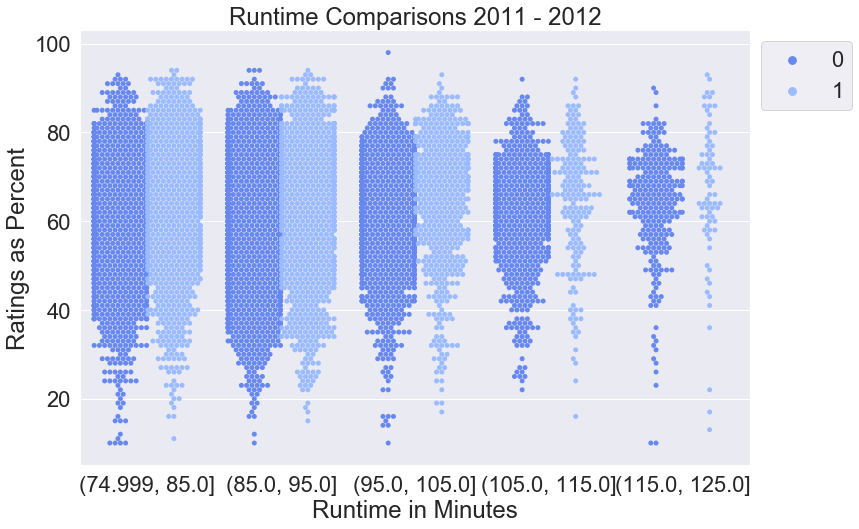

In [84]:
plt.figure(figsize=(12,8))

sns.set(font_scale=2)
sns.swarmplot(x='runtime_bin', y='rating_percent', data=runtimes_df1, hue='domestic', dodge=True, palette=sns.color_palette("coolwarm"))

plt.title('Runtime Comparisons 2011 - 2012')
plt.ylabel('Ratings as Percent')
plt.xlabel('Runtime in Minutes')
plt.legend(bbox_to_anchor=(1,1), loc=2)

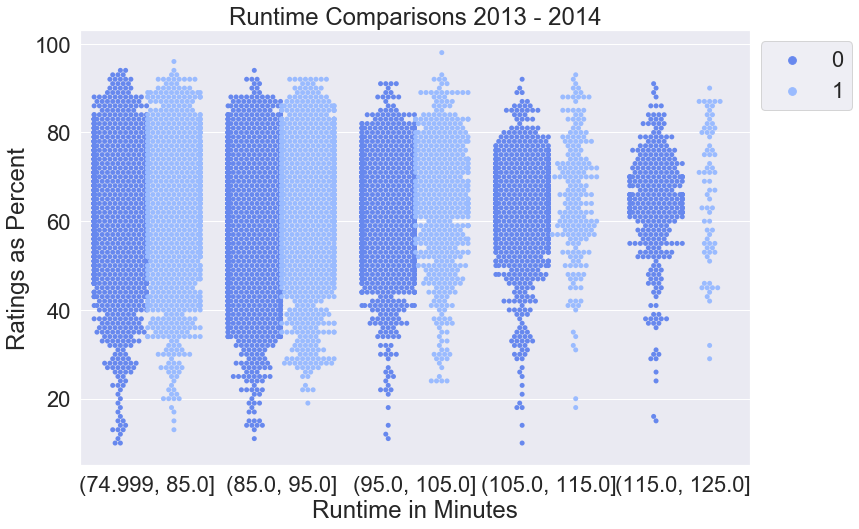

In [81]:
plt.figure(figsize=(12,8))

sns.set(font_scale=2)
sns.swarmplot(x='runtime_bin', y='rating_percent', data=runtimes_df2, hue='domestic', dodge=True, palette=sns.color_palette("coolwarm"))

plt.title('Runtime Comparisons 2013 - 2014')
plt.ylabel('Ratings as Percent')
plt.xlabel('Runtime in Minutes')
plt.legend(bbox_to_anchor=(1,1), loc=2)

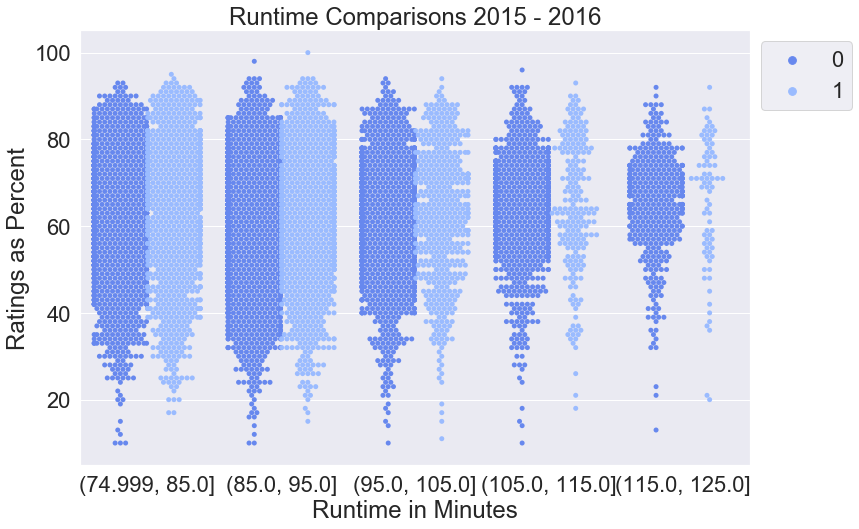

In [82]:
plt.figure(figsize=(12,8))

sns.set(font_scale=2)
sns.swarmplot(x='runtime_bin', y='rating_percent', data=runtimes_df3, hue='domestic', dodge=True, palette=sns.color_palette("coolwarm"))

plt.title('Runtime Comparisons 2015 - 2016')
plt.ylabel('Ratings as Percent')
plt.xlabel('Runtime in Minutes')
plt.legend(bbox_to_anchor=(1,1), loc=2)

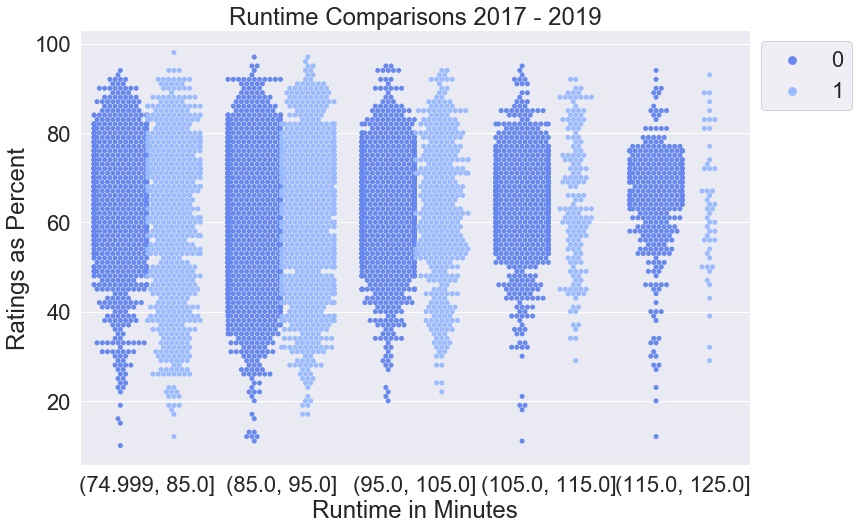

In [83]:
plt.figure(figsize=(12,8))

sns.set(font_scale=2)
sns.swarmplot(x='runtime_bin', y='rating_percent', data=runtimes_df4, hue='domestic', dodge=True, palette=sns.color_palette("coolwarm"))

plt.title('Runtime Comparisons 2017 - 2019')
plt.ylabel('Ratings as Percent')
plt.xlabel('Runtime in Minutes')
plt.legend(bbox_to_anchor=(1,1), loc=2)